# Convolution Examples

## zip, map reduce

In [2]:
l = ['apples','pears','oranges']
n = range(0,3)

In [5]:
for element in zip(n,l):
    print(element)

(0, 'apples')
(1, 'pears')
(2, 'oranges')


In [8]:
def square(n):
    return n*n

In [9]:
n = range(0,10)

In [11]:
m = map(square, n)
print(m)
print(list(m))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [14]:
ml = map(lambda x: x * x, n)
print(ml)
print(list(ml))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [1]:
from functools import reduce

numbers = [3, 4, 6, 9, 34, 12]

def custom_sum(first, second):
    return first + second

result = reduce(custom_sum, numbers)
print(result)

68


## Discrete Laplace

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


define discrete Laplace from 3 point finite difference

In [23]:
LaPlace1D = [1., -2., 1.]

### Convolution with Heaviside function

In [24]:
x = np.arange(-10,10,0.1)
Theta = np.heaviside(x, 0.5)

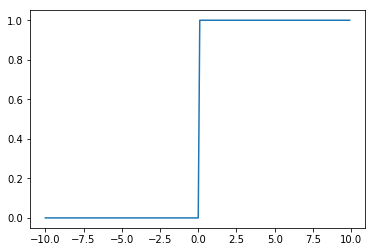

In [25]:
plot(x,Theta)

In [26]:
cTheta = np.zeros_like(Theta)
for i,xi in enumerate(x[1:-1]):
    cTheta[i] = np.sum(LaPlace1D*Theta[i:i+3])

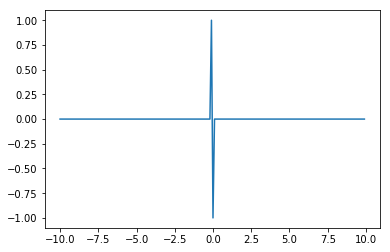

In [27]:
plot(x,cTheta)

### 2D Laplace

In [28]:
LaPlace2D = [[0., 1., 0.],[1., -4., 1.],[0., 1., 0.]]

In [54]:
x = np.arange(-10,10,0.1)
y = x
Theta2D = np.heaviside(np.meshgrid(x,y), 1.).T[:,:,1]

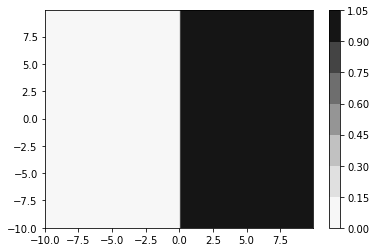

In [57]:
plt.contourf(x,y,Theta2D,cmap='Greys')
plt.colorbar()

In [56]:
cTheta2D = np.zeros_like(Theta2D)
for i,xi in enumerate(x[1:-1]):
    for j,yj in enumerate(y[1:-1]):
        cTheta2D[i,j] = np.sum(LaPlace2D*Theta2D[i:i+3,j:j+3])

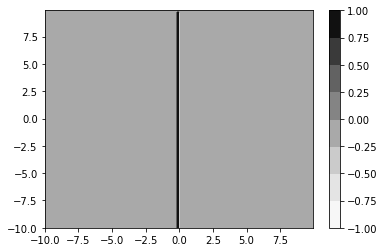

In [58]:
plt.contourf(x,y,cTheta2D,cmap='Greys')
plt.colorbar()

### Laplace filter (edge detection)
picture license: copyright free

In [59]:
import PIL.Image
from PIL import ImageOps 

In [91]:
# creating a image object 
img = PIL.Image.open('Laplaceexample.png') 
# applying grayscale method 
img = ImageOps.grayscale(img)   
img = np.array(img)

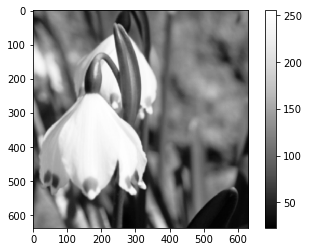

In [92]:
plt.imshow(img,cmap='Greys_r')
plt.colorbar()

In [93]:
cImg = np.zeros_like(img)
for i in range(1,img.shape[0]-2):
    for j in range(1,img.shape[1]-2):
        cImg[i,j] = np.sum(LaPlace2D*img[i:i+3,j:j+3])

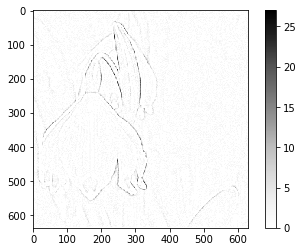

In [96]:
plt.imshow(cImg,cmap='Greys')
plt.colorbar()